In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import math
import torch
import torch.nn as nn
from torch.nn import Module
from tqdm import tqdm
from imgaug import augmenters as iaa
import imgaug as ia
from imgaug.augmentables.segmaps import SegmentationMapsOnImage
import gc
import pandas as pd
import cv2

In [ ]:
cd drive/MyDrive/phoi/data

/content/drive/MyDrive/phoi/data


In [ ]:
class_labels = {}
class_labels['fdsf'] = 323
class_labels['ewe'] = 757
class_labels['werq'] = 11
class_labels['dsad'] = 878
class_labels['zxc'] = 22
class_labels.values()

dict_values([323, 757, 11, 878, 22])

# Read data

In [ ]:
skin_images = []
mask_labels = []
class_labels = {}

class_labels_pd = pd.read_csv('class_labels.csv')

class_labels_pd['nevus'] = 1
class_labels_pd['nevus'] = class_labels_pd['nevus'] - class_labels_pd['melanoma'] - class_labels_pd['seborrheic_keratosis']

image_list = os.listdir('skin_images')
random.shuffle(image_list)

for image_path in tqdm(image_list):
  skin_image = cv2.imread('skin_images/' + image_path)
  skin_image = cv2.cvtColor(skin_image, cv2.COLOR_BGR2RGB)
  skin_image = skin_image/255
  skin_image = cv2.resize(skin_image, (256, 256), interpolation=cv2.INTER_AREA)
  skin_images.append(skin_image)

  mask_label = cv2.imread('segment_labels/' + image_path.split('.')[0] + '_segmentation.png', cv2.IMREAD_GRAYSCALE)
  mask_label = mask_label/255
  mask_label = cv2.resize(mask_label, (256, 256), interpolation=cv2.INTER_NEAREST)
  mask_labels.append(mask_label)

  # Đọc class nhãn
  class_labels[image_path.split('.')[0]] = np.array([
                                          class_labels_pd[class_labels_pd.image_id == image_path.split('.')[0]]['melanoma'].values[0],
                                          class_labels_pd[class_labels_pd.image_id == image_path.split('.')[0]]['seborrheic_keratosis'].values[0],
                                          class_labels_pd[class_labels_pd.image_id == image_path.split('.')[0]]['nevus'].values[0]
                                          ])

100%|██████████| 150/150 [02:16<00:00,  1.10it/s]


In [ ]:
skin_images = np.array(skin_images)
mask_labels = np.array(mask_labels)

In [ ]:
image_list

In [ ]:
class_labels

In [ ]:
np.array(list(class_labels.values()))

In [ ]:
np.unique(mask_labels)

array([0., 1.])

In [ ]:
ls ../loaded_data/ISIC/train/

class_labels.npy  mask_labels.npy  skin_images.npy


In [ ]:
np.save('../loaded_data/skin_images.npy', skin_images)
np.save('../loaded_data/mask_labels.npy', mask_labels)
np.save('../loaded_data/class_labels.npy', np.array(list(class_labels.values())))

In [ ]:
ls ../loaded_data/ISIC/test

class_labels.npy  mask_labels.npy  skin_images.npy


In [ ]:
skin_images = np.load('../loaded_data/ISIC/train/skin_images.npy')
mask_labels = np.load('../loaded_data/ISIC/train/mask_labels.npy')
class_labels = np.load('../loaded_data/ISIC/train/class_labels.npy')

In [ ]:
class0_index = np.where(class_labels.argmax(axis=1) == 0)[0]
class1_index = np.where(class_labels.argmax(axis=1) == 1)[0]
class2_index = np.where(class_labels.argmax(axis=1) == 2)[0] # class 3 không cần tăng cường

In [ ]:
skin_images_class0 = skin_images[class0_index]
skin_images_class1 = skin_images[class1_index]

mask_labels_class0 = mask_labels[class0_index]
mask_labels_class1 = mask_labels[class1_index]

class_labels_class0 = class_labels[class0_index]
class_labels_class1 = class_labels[class1_index]

In [ ]:
skin_images = np.concatenate((skin_images, skin_images_class0, skin_images_class0, skin_images_class1, skin_images_class1, skin_images_class1), axis=0)
gc.collect()

mask_labels = np.concatenate((mask_labels, mask_labels_class0, mask_labels_class0, mask_labels_class1, mask_labels_class1, mask_labels_class1), axis=0)
gc.collect()

class_labels = np.concatenate((class_labels, class_labels_class0, class_labels_class0, class_labels_class1, class_labels_class1, class_labels_class1), axis=0)
gc.collect()

0

In [ ]:
unique, counts = np.unique(class_labels.argmax(axis=1), return_counts=True)
print(np.asarray((unique, counts)).T)

[[   0 1122]
 [   1 1016]
 [   2 1372]]


In [ ]:
class_labels[-1510:-762].argmax(axis=1)

In [ ]:
np.save('../loaded_data/ISIC/train/skin_images_aug.npy', skin_images)
# np.save('../loaded_data/ISIC/train/mask_labels_aug.npy', mask_labels)
# np.save('../loaded_data/ISIC/train/class_labels_aug.npy', class_labels)

In [ ]:
class_labels.shape

(3510, 3)

In [ ]:
dic = {}
dic['z'] = 5
dic['a'] = 1
dic['c'] = 3
dic['m'] = 100
dic['y'] = 2
dic['r'] = 8
dic

{'z': 5, 'a': 1, 'c': 3, 'm': 100, 'y': 2, 'r': 8}

In [ ]:
k = 104
print(list(class_labels.keys())[k])
print(list(class_labels.values())[k])

ISIC_0007332
[0. 0. 1.]


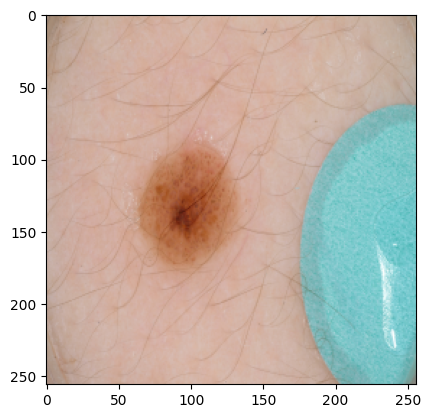

In [ ]:
plt.imshow(skin_images[k])

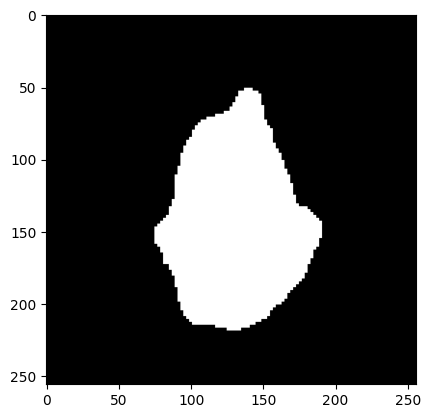

In [ ]:
plt.imshow(mask_labels[k], cmap='gray')

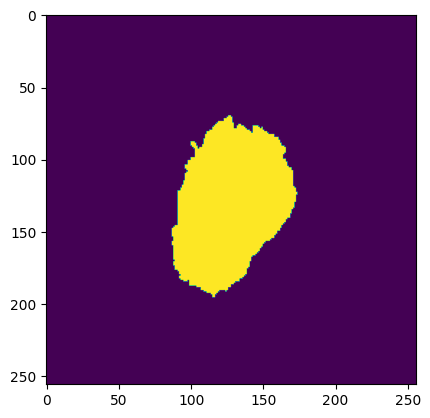

In [ ]:
plt.imshow(mask_label)

In [ ]:
# ct_images = []
# mask_labels = []
# classify_labels = []

# patients = os.listdir('drive/MyDrive/phoi/data/train/')

# random.shuffle(patients)

# for patient in patients:
#   print('Patient', patient)
#   cts = os.listdir('drive/MyDrive/phoi/data/train/' + patient + '/data/')
#   random.shuffle(cts)
#   for sl in tqdm(cts):
#     ct_image = np.load('drive/MyDrive/phoi/data/train/' + patient + '/data/' + sl)
#     mask_label = np.load('drive/MyDrive/phoi/data/train/' + patient + '/masks/' + sl)
#     ct_images.append(ct_image)
#     mask_labels.append(mask_label)

#     rs = np.sum(mask_label)
#     if rs > 0:
#       classify_labels.append(1)
#     else:
#       classify_labels.append(0)

In [ ]:
# ct_images = []
# mask_labels = []
# classify_labels = []

# patients = os.listdir('drive/MyDrive/phoi/data/val/')

# random.shuffle(patients)

# for patient in patients:
#   print('Patient', patient)
#   cts = os.listdir('drive/MyDrive/phoi/data/val/' + patient + '/data/')
#   random.shuffle(cts)
#   for sl in tqdm(cts):
#     ct_image = np.load('drive/MyDrive/phoi/data/val/' + patient + '/data/' + sl)
#     mask_label = np.load('drive/MyDrive/phoi/data/val/' + patient + '/masks/' + sl)
#     ct_images.append(ct_image)
#     mask_labels.append(mask_label)

#     rs = np.sum(mask_label)
#     if rs > 0:
#       classify_labels.append(1)
#     else:
#       classify_labels.append(0)

In [ ]:
ct_images = np.array(ct_images)
mask_labels = np.array(mask_labels)
classify_labels = np.array(classify_labels)

In [ ]:
np.save('drive/MyDrive/phoi/loadedData/val/ct_images.npy', ct_images)
np.save('drive/MyDrive/phoi/loadedData/val/mask_labels.npy', mask_labels)
np.save('drive/MyDrive/phoi/loadedData/val/classify_labels.npy', classify_labels)

In [ ]:
ct_images = np.load('drive/MyDrive/phoi/loadedData/val/ct_images.npy')
mask_labels = np.load('drive/MyDrive/phoi/loadedData/val/mask_labels.npy')
classify_labels = np.load('drive/MyDrive/phoi/loadedData/val/classify_labels.npy')

In [ ]:
ct_images.shape

(1335, 256, 256)

# Chia train, validation và lưu file

In [ ]:
count = 0
patient_ls = sorted(os.listdir('train'), key=int)
for i in patient_ls:
  patient_slice = os.listdir('train/' + i + '/masks')
  print(i, len(patient_slice))
  count += len(patient_slice)

In [ ]:
validation_ls = ['55', '43', '39', '30', '15', '9']
train_ls = [x for x in patient_ls if x not in validation_ls]

## Tập train

In [ ]:
ct_images = []
mask_labels = []
classify_labels = []

random.shuffle(train_ls)

for patient in train_ls:
  print('Patient', patient)
  cts = os.listdir('train/' + patient + '/data/')
  random.shuffle(cts)
  for sl in tqdm(cts):
    ct_image = np.load('train/' + patient + '/data/' + sl)
    mask_label = np.load('train/' + patient + '/masks/' + sl)
    ct_images.append(ct_image)
    mask_labels.append(mask_label)

    rs = np.sum(mask_label)
    if rs > 0:
      classify_labels.append(1)
    else:
      classify_labels.append(0)

ct_images = np.array(ct_images)
mask_labels = np.array(mask_labels)
classify_labels = np.array(classify_labels)

Patient 25


100%|██████████| 501/501 [03:32<00:00,  2.36it/s]


Patient 38


100%|██████████| 271/271 [01:56<00:00,  2.33it/s]


Patient 12


100%|██████████| 246/246 [01:42<00:00,  2.40it/s]


Patient 19


100%|██████████| 243/243 [01:49<00:00,  2.22it/s]


Patient 23


100%|██████████| 219/219 [01:30<00:00,  2.43it/s]


Patient 33


100%|██████████| 221/221 [01:29<00:00,  2.47it/s]


Patient 28


100%|██████████| 237/237 [01:41<00:00,  2.34it/s]


Patient 53


100%|██████████| 258/258 [01:44<00:00,  2.47it/s]


Patient 56


100%|██████████| 85/85 [01:21<00:00,  1.04it/s]


Patient 49


100%|██████████| 292/292 [02:00<00:00,  2.42it/s]


Patient 8


100%|██████████| 274/274 [02:04<00:00,  2.20it/s]


Patient 45


100%|██████████| 230/230 [01:39<00:00,  2.31it/s]


Patient 48


100%|██████████| 247/247 [01:41<00:00,  2.44it/s]


Patient 36


100%|██████████| 537/537 [03:56<00:00,  2.27it/s]


Patient 26


100%|██████████| 211/211 [01:31<00:00,  2.31it/s]


Patient 46


100%|██████████| 213/213 [01:26<00:00,  2.46it/s]


Patient 18


100%|██████████| 98/98 [01:31<00:00,  1.07it/s]


Patient 44


100%|██████████| 221/221 [01:35<00:00,  2.32it/s]


Patient 34


100%|██████████| 181/181 [01:11<00:00,  2.55it/s]


Patient 50


100%|██████████| 241/241 [01:36<00:00,  2.49it/s]


Patient 35


100%|██████████| 234/234 [01:39<00:00,  2.36it/s]


Patient 32


100%|██████████| 99/99 [01:36<00:00,  1.02it/s]


Patient 10


100%|██████████| 198/198 [01:25<00:00,  2.31it/s]


Patient 16


100%|██████████| 420/420 [02:57<00:00,  2.37it/s]


Patient 17


100%|██████████| 463/463 [03:12<00:00,  2.41it/s]


Patient 5


100%|██████████| 299/299 [02:06<00:00,  2.36it/s]


Patient 51


100%|██████████| 453/453 [03:14<00:00,  2.32it/s]


Patient 7


100%|██████████| 82/82 [01:16<00:00,  1.07it/s]


Patient 14


100%|██████████| 225/225 [01:32<00:00,  2.44it/s]


Patient 3


100%|██████████| 339/339 [02:31<00:00,  2.23it/s]


Patient 6


100%|██████████| 252/252 [01:45<00:00,  2.39it/s]


Patient 27


100%|██████████| 212/212 [01:27<00:00,  2.42it/s]


Patient 42


100%|██████████| 188/188 [01:17<00:00,  2.42it/s]


Patient 24


100%|██████████| 284/284 [01:55<00:00,  2.47it/s]


Patient 11


100%|██████████| 95/95 [01:30<00:00,  1.05it/s]


Patient 22


100%|██████████| 261/261 [01:50<00:00,  2.36it/s]


Patient 29


100%|██████████| 221/221 [01:44<00:00,  2.12it/s]


Patient 54


100%|██████████| 197/197 [01:26<00:00,  2.28it/s]


Patient 4


100%|██████████| 96/96 [01:38<00:00,  1.03s/it]


Patient 0


100%|██████████| 559/559 [04:17<00:00,  2.17it/s]


Patient 41


100%|██████████| 210/210 [01:32<00:00,  2.28it/s]


Patient 1


100%|██████████| 606/606 [04:20<00:00,  2.33it/s]


Patient 13


100%|██████████| 266/266 [01:50<00:00,  2.41it/s]


Patient 20


100%|██████████| 196/196 [01:28<00:00,  2.22it/s]


Patient 21


100%|██████████| 198/198 [01:22<00:00,  2.40it/s]


Patient 47


100%|██████████| 236/236 [01:44<00:00,  2.26it/s]


Patient 40


100%|██████████| 212/212 [01:35<00:00,  2.22it/s]


Patient 52


100%|██████████| 211/211 [01:26<00:00,  2.43it/s]


Patient 31


100%|██████████| 259/259 [01:51<00:00,  2.33it/s]


Patient 37


100%|██████████| 346/346 [02:37<00:00,  2.20it/s]


Patient 2


100%|██████████| 211/211 [01:28<00:00,  2.38it/s]


In [ ]:
index = np.random.permutation(ct_images.shape[0])

ct_images = ct_images[index]
mask_labels = mask_labels[index]
classify_labels = classify_labels[index]

In [ ]:
classify_labels.shape

(13154,)

In [ ]:
np.sum((np.sum(mask_labels, axis=(1, 2)) > 0).astype(int) == classify_labels)

13154

In [ ]:
np.save('../loadedData/train_moi/ct_images.npy', ct_images)
np.save('../loadedData/train_moi/mask_labels.npy', mask_labels)
np.save('../loadedData/train_moi/classify_labels.npy', classify_labels)

## Tập valid

In [ ]:
ct_images = []
mask_labels = []
classify_labels = []

random.shuffle(validation_ls)

for patient in validation_ls:
  print('Patient', patient)
  cts = os.listdir('train/' + patient + '/data/')
  random.shuffle(cts)
  for sl in tqdm(cts):
    ct_image = np.load('train/' + patient + '/data/' + sl)
    mask_label = np.load('train/' + patient + '/masks/' + sl)
    ct_images.append(ct_image)
    mask_labels.append(mask_label)

    rs = np.sum(mask_label)
    if rs > 0:
      classify_labels.append(1)
    else:
      classify_labels.append(0)

ct_images = np.array(ct_images)
mask_labels = np.array(mask_labels)
classify_labels = np.array(classify_labels)

Patient 30


100%|██████████| 211/211 [01:37<00:00,  2.16it/s]


Patient 15


100%|██████████| 215/215 [01:32<00:00,  2.32it/s]


Patient 9


100%|██████████| 201/201 [01:24<00:00,  2.37it/s]


Patient 55


100%|██████████| 211/211 [01:31<00:00,  2.30it/s]


Patient 39


100%|██████████| 218/218 [01:40<00:00,  2.18it/s]


Patient 43


100%|██████████| 222/222 [01:47<00:00,  2.06it/s]


In [ ]:
index = np.random.permutation(ct_images.shape[0])

ct_images = ct_images[index]
mask_labels = mask_labels[index]
classify_labels = classify_labels[index]

In [ ]:
np.sum((np.sum(mask_labels, axis=(1, 2)) > 0).astype(int) == classify_labels)

1278

In [ ]:
np.save('../loadedData/valid_moi/ct_images.npy', ct_images)
np.save('../loadedData/valid_moi/mask_labels.npy', mask_labels)
np.save('../loadedData/valid_moi/classify_labels.npy', classify_labels)

# Augment tập train

In [ ]:
skin_images = np.load('../loaded_data/ISIC/train/skin_images.npy')
mask_labels = np.load('../loaded_data/ISIC/train/mask_labels.npy')
class_labels = np.load('../loaded_data/ISIC/train/class_labels.npy')

In [ ]:
mask_labels = mask_labels.astype(np.int32)

In [ ]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 18)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.LinearContrast((0.75, 1.25)),
    iaa.Affine(translate_percent=0.08, scale=(0.85, 1.15), rotate=(-45, 45), cval=1),
])

In [ ]:
n = len(skin_images)
n

2000

In [ ]:
skin_images.dtype

dtype('float64')

In [ ]:
k = 1290
segmap = SegmentationMapsOnImage(mask_labels[k], shape=skin_images[k].shape)
images_aug, segmaps_aug = seq(image=skin_images[k], segmentation_maps=segmap)

In [ ]:
images_aug.max()

1.0

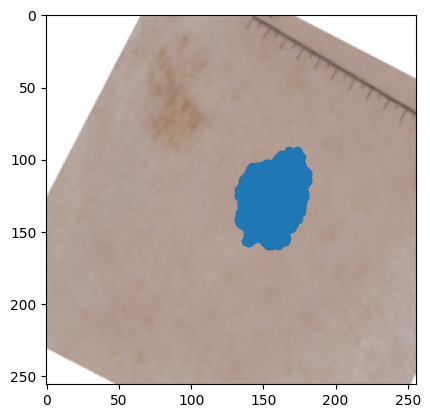

In [ ]:
plt.imshow(images_aug)
plt.scatter(np.where(segmaps_aug.get_arr() == 1)[1], np.where(segmaps_aug.get_arr() == 1)[0])

## Lần 1

In [ ]:
ct_images_aug = []
mask_labels_aug = []
class_labels_aug = []

for k in tqdm(range(n)):
  segmap = SegmentationMapsOnImage(mask_labels[k], shape=skin_images[k].shape)
  images_aug, segmaps_aug = seq(image=skin_images[k], segmentation_maps=segmap)

  ct_images_aug.append(images_aug)
  mask_labels_aug.append(segmaps_aug.get_arr())
  class_labels_aug.append(class_labels[k])

ct_images_aug_1 = np.array(ct_images_aug)
mask_labels_aug_1 = np.array(mask_labels_aug)
classify_labels_aug_1 = np.array(class_labels_aug)

100%|██████████| 2000/2000 [00:29<00:00, 67.89it/s]


In [ ]:
classify_labels_aug_1

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0]])

In [ ]:
np.sum(class_labels == classify_labels_aug_1)

6000

In [ ]:
a = np.sum(mask_labels_aug_1, axis=(1, 2, 3)) > 0
np.sum(a)

1324

In [ ]:
np.where(a == False)

(array([], dtype=int64),)

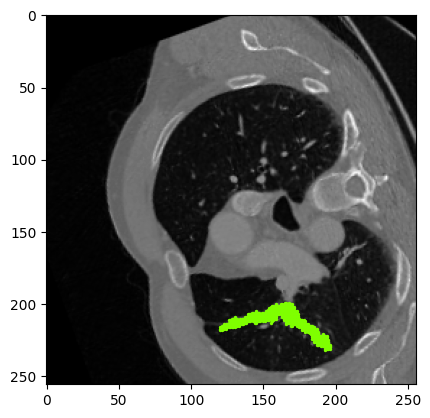

In [ ]:
k = 322
plt.imshow(ct_images_aug_1[k], cmap='gray')
mask_temp = np.where(mask_labels_aug_1[k] == 1)
plt.scatter(x=mask_temp[1], y=mask_temp[0], c='#7FFF00', s=2)

In [ ]:
mask_temp

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

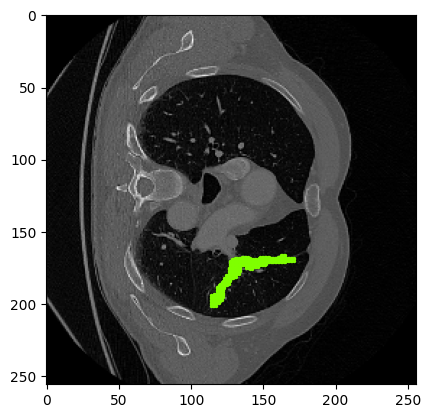

In [ ]:
plt.imshow(ct_images_tumor[k], cmap='gray')
mask_temp = np.where(mask_labels_tumor[k] == 1)
plt.scatter(x=mask_temp[1], y=mask_temp[0], c='#7FFF00', s=2)

## Lần 2

In [ ]:
ct_images_aug = []
mask_labels_aug = []
class_labels_aug = []

for k in tqdm(range(n)):
  segmap = SegmentationMapsOnImage(mask_labels_tumor[k], shape=ct_images_tumor[k].shape)
  images_aug, segmaps_aug = seq(image=ct_images_tumor[k], segmentation_maps=segmap)

  ct_images_aug.append(images_aug)
  mask_labels_aug.append(segmaps_aug.get_arr())
  class_labels_aug.append(class_labels_tumor[k])

ct_images_aug_2 = np.array(ct_images_aug)
mask_labels_aug_2 = np.array(mask_labels_aug)
classify_labels_aug_2 = np.array(class_labels_aug)

100%|██████████| 1324/1324 [00:10<00:00, 120.52it/s]


In [ ]:
a = np.sum(mask_labels_aug_2, axis=(1, 2, 3)) > 0
np.sum(a)

1324

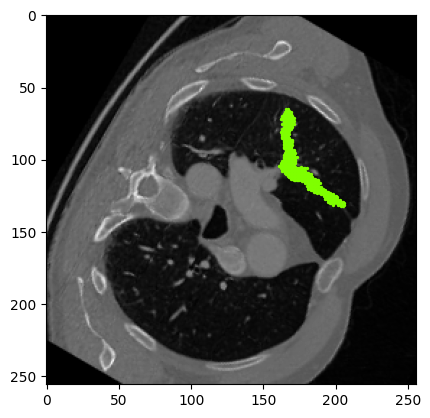

In [ ]:
k = 322
plt.imshow(ct_images_aug_2[k], cmap='gray')
mask_temp = np.where(mask_labels_aug_2[k] == 1)
plt.scatter(x=mask_temp[1], y=mask_temp[0], c='#7FFF00', s=2)

## Lần 3

In [ ]:
ct_images_aug = []
mask_labels_aug = []
class_labels_aug = []

for k in tqdm(range(n)):
  segmap = SegmentationMapsOnImage(mask_labels_tumor[k], shape=ct_images_tumor[k].shape)
  images_aug, segmaps_aug = seq(image=ct_images_tumor[k], segmentation_maps=segmap)

  ct_images_aug.append(images_aug)
  mask_labels_aug.append(segmaps_aug.get_arr())
  class_labels_aug.append(class_labels_tumor[k])

ct_images_aug_3 = np.array(ct_images_aug)
mask_labels_aug_3 = np.array(mask_labels_aug)
classify_labels_aug_3 = np.array(class_labels_aug)

100%|██████████| 1324/1324 [00:10<00:00, 122.56it/s]


In [ ]:
a = np.sum(mask_labels_aug_3, axis=(1, 2, 3)) > 0
np.sum(a)

1324

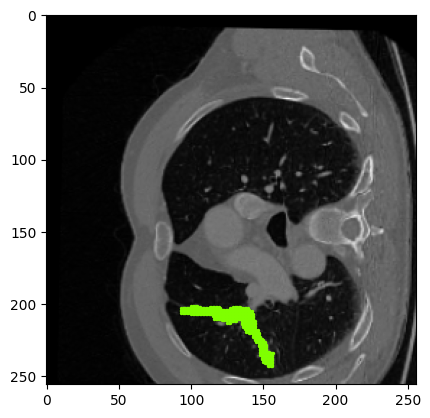

In [ ]:
k = 322
plt.imshow(ct_images_aug_3[k], cmap='gray')
mask_temp = np.where(mask_labels_aug_3[k] == 1)
plt.scatter(x=mask_temp[1], y=mask_temp[0], c='#7FFF00', s=2)

## Nối vào data ban đầu

In [ ]:
ct_images_aug.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
ct_images_aug = np.concatenate([ct_images, ct_images_aug_1, ct_images_aug_2, ct_images_aug_3], axis=0)
mask_labels_aug = np.concatenate([mask_labels, mask_labels_aug_1, mask_labels_aug_2, mask_labels_aug_3], axis=0)
class_labels_aug = np.concatenate([class_labels, classify_labels_aug_1, classify_labels_aug_2, classify_labels_aug_3], axis=0)

In [ ]:
shuffle_index = np.random.permutation(len(ct_images_aug))
ct_images_aug = ct_images_aug[shuffle_index]
mask_labels_aug = mask_labels_aug[shuffle_index]
class_labels_aug = class_labels_aug[shuffle_index]

gc.collect()

In [ ]:
ct_images_aug.shape

(17126, 256, 256, 1)

In [ ]:
class_labels_aug

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
np.sum((np.sum(mask_labels_aug, axis=(1, 2)) > 0).astype(int) == class_labels_aug)

17126

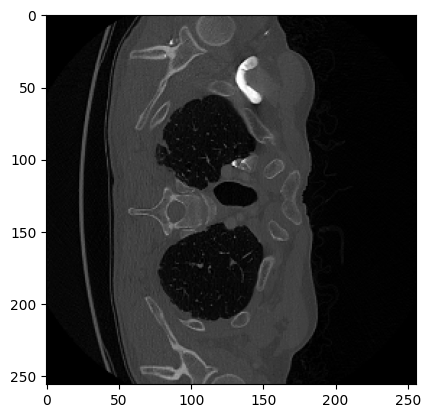

In [ ]:
k = 1935
plt.imshow(ct_images_aug[k], cmap='gray')
mask_temp = np.where(mask_labels_aug[k] == 1)
plt.scatter(x=mask_temp[1], y=mask_temp[0], c='#7FFF00', s=2)

In [ ]:
np.save('../loadedData/train_moi/ct_images.npy', ct_images_aug)
np.save('../loadedData/train_moi/mask_labels.npy', mask_labels_aug)
np.save('../loadedData/train_moi/classify_labels.npy', class_labels_aug)